In [1]:
#Importations
import random as rd
import numpy as np
import copy as copy
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
#Liste de valeurs afin de faciliter les tests
D=[2,5,10,50,100]
P=[10,20,40,80,160,320,1000]
K=[1,2,3,4,5,6,7,8,9,10] 

In [3]:
#Fonction Matyas avec coordonnées (x,y) en argument -> Dimension 2
def Matyas(vec):
    x = vec[0]
    y = vec[1]
    return 0.26*(x**2+y**2) - 0.48*x*y

In [4]:
#Fonction Styblinski-Tang avec coordonnées (x1,x2,...,xn) en argument -> Dimension n 
def Styblinski_Tang(vec):
    n = len(vec)
    sum = 0
    for k in range(n):
        sum += vec[k]**4 - 16*vec[k]**2 + 5*vec[k]
    sum = sum/2
    return sum

In [5]:
#Fonction qui va exécuter tout l'algorithme principal, et renvoyer l'essaim à l'instant k, le minimum global, ses coordonnées et la liste des 
#erreurs entre le minimum global théorique et le minimum global observé

#P : Essaim initial / f : fonction qu'on choisit / a : borne inférieure de la fonction / b : borne supérieure 
#dim : dimension choisie / pop : nombre de particules 
#k : Nombre d'itérations / boolean_chaos : Si on met True c'est qu'on choisit la fonction chaos
def PSO(P,f,a,b,dim,pop,k,boolean_chaos): 
    pbest = copy.deepcopy(P) #Initialement, chaque pbest des xi est lui même car il n'y en a jamais eu avant
    l=[]
    #On initialise gbest : qui est le meilleur des pbest de l'essaim initial, donc le meilleur des xi
    for i in range(pop):
        l.append(f(P[i]))
    index=l.index(min(l))
    gbest=P[index]
    #On a un triplet de constantes à choisir afin que nos 2 fonctions marchent :
    #Pour Matyas il faut mettre w = 0.8 ; wp = 0.4 ; wg = 0.4
    #Pour Styblinski il faut mettre w = 0.9 ; wp = 0.9 ; wg = 0.9
    w = 0.9 
    wp = 0.9
    wg = 0.9
    #Le minimum global de la fonction de Matyas est 0 : on n'en a pas besoin pour calculer l'erreur car on prendra erreur du minimum
    #global de Matyas = | minimum global obtenu |
    #Le minimum global de la fonction de Styblinski-Tang est d'environ -39.166165 * dimension_choisie
    #Ce minimum n'est pas nul donc on en aura besoin : on le rajoute 
    min_Styb = ((-39.16617 - 39.16616)/2)*dim
    liste_err = []
    a_chaos = 0.33 #Nous avons la Kent chaos map : on initialise la constante "a"
    v = np.zeros((pop,dim)) #on prend vitesse initiale des particules = 0 
    for l in range(k): #On boucle sur le nombre d'itérations
        x = copy.deepcopy(P) #Permet de garder l'ancien P car on en a besoin pour calculer la vitesse
        if boolean_chaos == False : #Si on ne choisit pas la fonction chaos, on calcule les rk avec random
            rk = rd.random()
        else : #Si on choisit la fonction chaos, on calcule rk avec Kent chaos map
            if l == 0:
                rk = rd.random()
            if rk > 0 and rk < a_chaos :
                rk = rk/a_chaos
            else :
                rk = (1-rk)/(1-a_chaos)
        l = []
        d = []
        for i in range(pop): #On boucle sur chaque particule pour chaque itération
            v[i] = w*v[i] + rk*wp*(pbest[i]-x[i]) + rk*wg*(gbest-x[i]) 
            P[i] = x[i] + v[i]
            for j in range(dim): #Pour chaque élément de chaque particule et pour chaque itération on regarde si on est encore dans l'intervalle
                #de définition de la fonction choisie
                P[i][j] = min(b,max(a,P[i][j]))
            #On calcule nos pbest pour chaque xi : on remplace l'ancien s'il est plus précis
            if f(P[i])< f(pbest[i]):
                pibest=P[i]
                pbest[i]=pibest
        #Une fois qu'on a calculé les pbest de chaque xi : on choisit le meilleur de tous et on le remplace s'il est plus précis que l'ancien
        for b in range(pop):
            l.append(pbest[b])
            d.append(f(pbest[b]))
        index=d.index(min(d))
        if d[index]<f(gbest):
            gbest=l[index]
            
        if f == Matyas : #Le calcul de l'erreur pour Matays et pour Styblinski-Tang est différent donc on différencie les deux 
            err = abs(f(gbest))
            liste_err.append(err)
        if f == Styblinski_Tang :
            err = abs(f(gbest) - min_Styb )/abs(min_Styb)
            liste_err.append(err)
    return P,gbest,f(gbest),liste_err

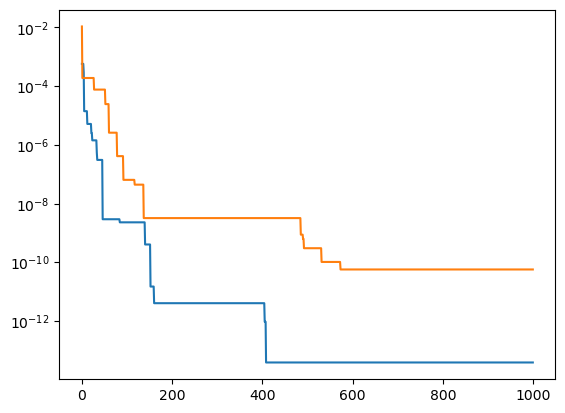

In [6]:
#Fonction Matyas 

#Le graphique représente l'erreur du minimum global trouvé avec le minimum global théorique en fonction du nombre d'itérations
#La courbe bleue est celle sans Kent chaos map
#La courbe orange est celle avec Kent chaos map
a = -10
b = 10
pop = 320
dim = 2
n = 1000

Pa = a + np.random.rand(pop,dim)*(b-a)
P0 = copy.deepcopy(Pa)

Pk,vec,min_global,err_liste = PSO(P0,Matyas,a,b,dim,pop,n,False)
Pk2,vec2,min_global2,err_liste2 = PSO(Pa,Matyas,a,b,dim,pop,n,True)

k_liste = list(range(n))

plt.plot(k_liste,err_liste)
plt.yscale('log')
plt.plot(k_liste,err_liste2)
plt.show() 

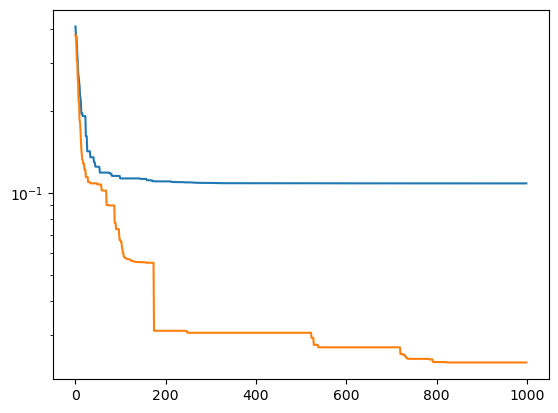

In [7]:
#Fonction Styblinski-Tang

#Le graphique représente l'erreur du minimum global trouvé avec le minimum global théorique en fonction du nombre d'itérations
#La courbe bleue est celle sans Kent chaos map
#La courbe orange est celle avec Kent chaos map

a = -5
b = 5
pop = 320
dim = 20
n = 1000
Pa = a + np.random.rand(pop,dim)*(b-a)
P0 = copy.deepcopy(Pa)

Pk,vec,min_global,err_liste = PSO(P0,Styblinski_Tang,a,b,dim,pop,n,False)
Pk2,vec2,min_global2,err_liste2 = PSO(Pa,Styblinski_Tang,a,b,dim,pop,n,True)

k_liste = list(range(n))

plt.plot(k_liste,err_liste)
plt.plot(k_liste,err_liste2)
plt.yscale('log')
plt.show()

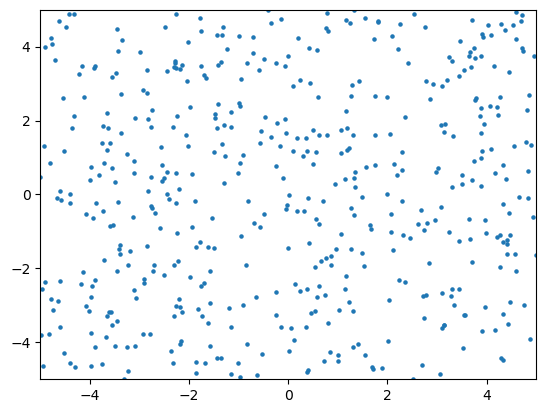

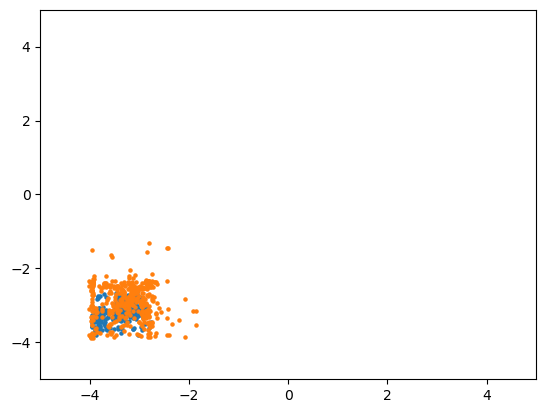

In [8]:
#Graphiques représentant les coordonnées de chaque particule trouvées après k itérations de l'essaim 
#Afin de comparer, on affiche aussi le graphique de l'essaim initial
#En bleu sans Kent chaos map
#En orange avec Kent chaos map


#Il faut changer les bornes et le nom de la fonction si on veut Matyas ou Styblinski-Tang
a = -5
b = 5
pop = 500
dim = 20
n = 60

Pa = a + np.random.rand(pop,dim)*(b-a)
P0 = copy.deepcopy(Pa)
P1 = copy.deepcopy(Pa)

Pk,vec,min_global,err_liste = PSO(P0,Styblinski_Tang,a,b,dim,pop,n,False)
Pk2,vec2,min_global2,err_liste2 = PSO(Pa,Styblinski_Tang,a,b,dim,pop,n,True)


xk = Pk[:,0]
yk = Pk[:,1]

xk2 = Pk2[:,0]
yk2 = Pk2[:,1]

x0 = P1[:,0]
y0 = P1[:,1]


plt.scatter(x0,y0,s=5)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

plt.scatter(xk,yk,s=5)
plt.scatter(xk2,yk2,s=5)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [9]:
#Cette partie permet d'afficher le minimum global trouvé pour une fonction 
#Elle permet aussi d'afficher les coordonnées de la meilleure particule qui approxime ce minimum global

a = -5
b = 5
pop = 320
dim = 20
n = 1000

Pa = a + np.random.rand(pop,dim)*(b-a)
P0 = copy.deepcopy(Pa)

Pk,vec,min_global,err_liste = PSO(P0,Styblinski_Tang,a,b,dim,pop,n,True)
Pk2,vec2,min_global2,err_liste2 = PSO(Pa,Styblinski_Tang,a,b,dim,pop,n,True)
print("Sans chaos :")
print("Coordonnées du min global :")
print(vec)
print("Min global :")
print(min_global)
print()
print("Avec chaos :")
print("Coordonnées du min global :")
print(vec2)
print("Min global :")
print(min_global2)

Sans chaos :
Coordonnées du min global :
[-2.85152388 -2.97347201 -3.00506761 -2.88728838 -2.86950629 -2.98001808
 -2.906897   -2.88412151 -2.88467001 -2.89099299 -2.8758081  -2.84778983
 -2.80771684 -2.93604298 -2.98299965 -2.92048861 -2.92294699 -2.91766636
 -2.98435046 -2.88280081]
Min global :
-782.374174613744

Avec chaos :
Coordonnées du min global :
[-2.94755605 -2.82088786 -2.83993628 -2.9085128  -2.94991258 -2.90489644
 -2.87443244 -2.98471271 -2.84729743 -2.99015295 -2.86108553 -2.92825579
 -2.96349701 -2.90613382 -2.93536764 -2.96136453 -2.93700576 -3.00658016
 -2.8917951  -2.90496843]
Min global :
-782.3553802231851
